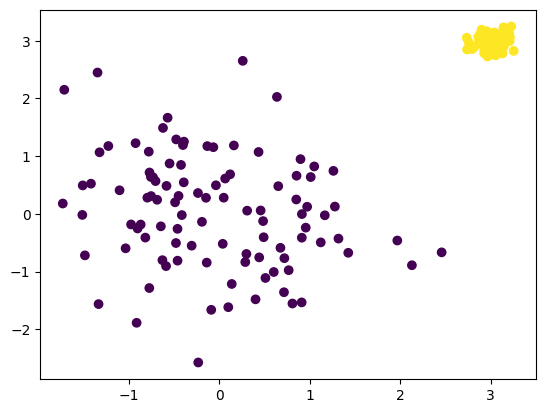

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#create 2 clouds of points in a 2d space and plot it, divided by color

x1 = np.random.normal(0,1,(2,100))  #--------> in a clustering situation I have k==2 (data truncated)
x2 = np.random.normal(3,.1,(2,100))

y1= np.zeros((100,))
y2= np.ones((100,))

#visualizing coloring by class
#join together x1 and x2

X = np.concatenate((x1,x2), axis=1) #axis 1 == by column
Y = np.concatenate((y1,y2))

#plt.scatter(X[0,:], X[1,:], c=Y)  #c stands for "color". color so depends on the values of Y in the same positions
plt.scatter(X.T[:,0], X.T[:,1], c=Y)  #does same thing


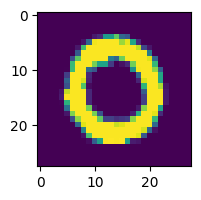

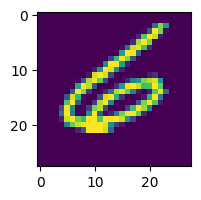

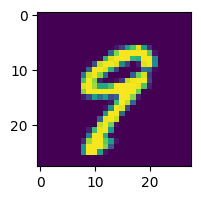

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
#LDA : linear discriminant analysis

#we want each digit to be far from the cluster ??
import pandas as pd
data = pd.read_csv("data.csv")
data = np.array(data) 
Y = data[:, 0]
X = data[:, 1:].T  #transposition

def specify_sample(X, Y, dig):
    ind = Y == dig
    Y_dig = Y[ind]
    X_dig = X[:, ind]
    return (X_dig, Y_dig)
x1, y1 = specify_sample(X, Y, 0)
x2, y2 = specify_sample(X, Y, 6)
x3, y3 = specify_sample(X, Y, 9)

for x in (x1,x2,x3):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x[:, 0], (28,28)))
plt.show()

y1

In [15]:
X = np.concatenate((x1,x2,x3), axis=1)
Y = np.concatenate((y1,y2,y3))

ck = []
xk=[]
for x in (x1,x2,x3):
    c = np.mean(x, axis= 1).reshape((784, 1))   #centroide di ogni digit
    ck.append(c)
    xk.append(x-c)
#xk = [x1k, x2k, x3k] ---> samples x1,x2,x3 centrati

C = np.mean(X, axis=1).reshape((784, 1))

#plt.imshow(np.reshape(ck[1], (28,28)))

X_w = np.concatenate(xk,axis=1)
Sw = X_w@X_w.T
Xbar1 = np.repeat(ck[0], x1.shape[1], axis=1)  #axis = 1 : Metti per x1.shape[1] (che sarebbe N1) --> N1 colonne con lo stesso valore che sarebbe c1 (vettore)
Xbar2 = np.repeat(ck[1], x2.shape[1], axis=1)
Xbar3 = np.repeat(ck[2], x3.shape[1], axis=1)
print(Xbar1.shape)

Xbar = np.concatenate((Xbar1, Xbar2, Xbar3), axis=1)
Xbarc = Xbar - C

Sb = Xbarc@Xbarc.T


(784, 4132)


In [16]:
try:
    L = np.linalg.cholesky(Sw)
except: 
    epsilon = 1e-6
    Sw = Sw + epsilon * np.eye(Sw.shape[0])
    L = np.linalg.cholesky(Sw)


(784, 2) (784, 12457)


<function matplotlib.pyplot.show(close=None, block=None)>

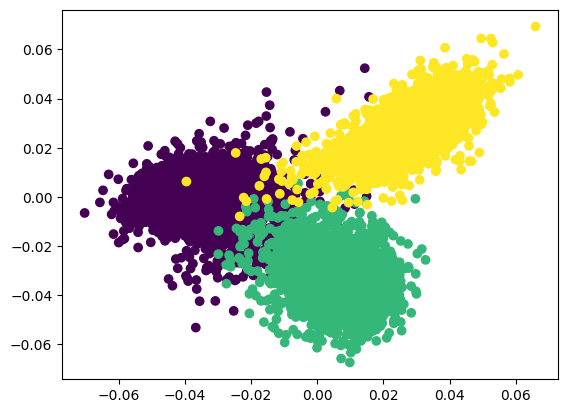

In [17]:
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
k = 2
Linv = np.linalg.inv(L)
lb, W = scipy.sparse.linalg.eigs(Linv@Sb@L, 2)

W = np.real(W)
Q = Linv.T@W #----> matrice della proiezione
print(Q.shape, X.shape)
Z = Q.T@X
plt.scatter(Z[0,:], Z[1,:], c=Y)
plt.show